In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans, MeanShift, DBSCAN

from sklearn.preprocessing import StandardScaler

In [34]:
from google.colab import drive
drive.mount('/content/drive')

path = '/content/drive/MyDrive/Colab_Notebooks/MachineLearning_BigData/clustering/Crimenes.csv'
df = pd.read_csv(path)

data = df.copy()
# data.info()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### K-means


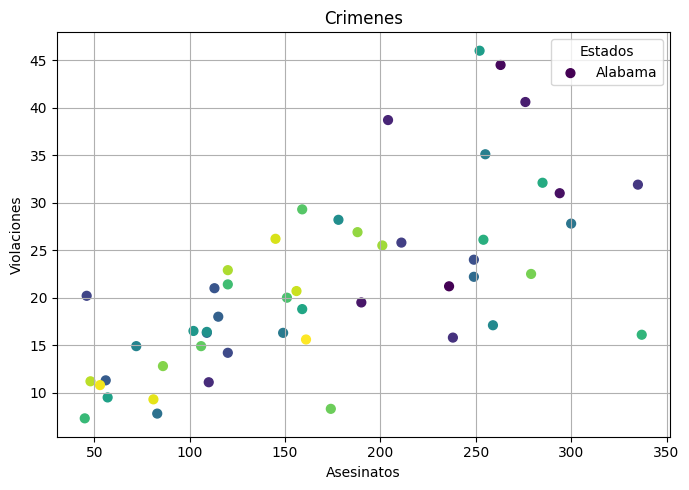

In [35]:
import matplotlib.pyplot as plt

# Datos a visualizar

plt.figure(figsize=(7, 5))  # Cambiamos el tamaño de la figura
# c=data['Estado'].astype('category').cat.codes


# Dibujar el scatter plot para data
plt.scatter(data['Asaltos'], data['Violaciones'], c=data['Estado'].astype('category').cat.codes ,s=40, cmap='viridis')
plt.title('Crimenes')
plt.xlabel("Asesinatos")
plt.ylabel("Violaciones")
plt.grid(True)

# Añadir una leyenda para los países
legend_labels = data['Estado'].unique()
plt.legend(legend_labels, title='Estados')

# print(legend_labels)

plt.tight_layout()
plt.show()

In [36]:
data.head()

,Estado,Asesinatos,Asaltos,Poblacion Urbana,Violaciones
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



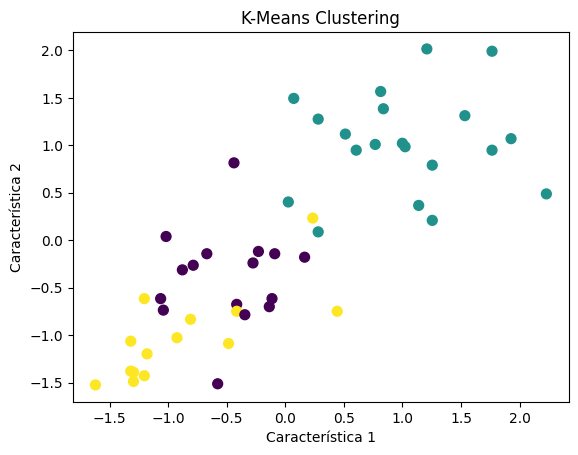

In [37]:
# Seleccionar las columnas de características (excluyendo la columna de nombres de estado)
columnas_caracteristicas = data.columns[1:]

# Seleccionar las características para el clustering
X = data[columnas_caracteristicas]

# Escalar las características para asegurar que todas tengan la misma escala
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Establecer el número de clusters (puedes ajustar este valor)
n_clusters = 3

# Crear el modelo K-Means
kmeans = KMeans(n_clusters=n_clusters, random_state=42)

# Realizar el clustering
data['Cluster'] = kmeans.fit_predict(X_scaled)

# Visualizar los resultados (solo para 2 características)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=data['Cluster'], cmap='viridis', s=50)
plt.title('K-Means Clustering')
plt.xlabel('Característica 1')
plt.ylabel('Característica 2')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

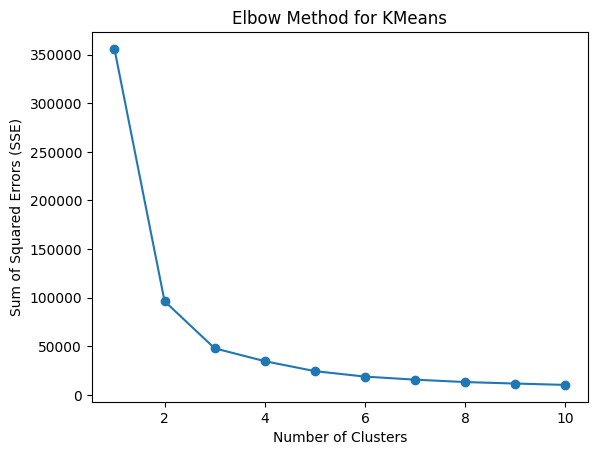

In [38]:
data_ = df.iloc[:,1:]

# Se reutiliza la funcion vista en clase, es practica para iterar entra distintos N y evaluar el apropiado

def find_optimal_clusters_kmeans(data, max_k):
    sse = [] # Sum of squared errors
    for k in range(1, max_k+1):
        kmeans = KMeans(n_clusters=k).fit(data)
        sse.append(kmeans.inertia_)

    plt.plot(range(1, max_k+1), sse, 'o-')
    plt.xlabel("Number of Clusters")
    plt.ylabel("Sum of Squared Errors (SSE)")
    plt.title("Elbow Method for KMeans")
    plt.show()

find_optimal_clusters_kmeans(data_, 10)

Como se ve en la grafica el valor N a utilizar que tiene menor SSE si utilizar un numero excesivo de clusters es 3.

In [39]:
data_.shape[1]

4

In [40]:
data_.head()

,Asesinatos,Asaltos,Poblacion Urbana,Violaciones
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6


In [41]:
data = df.copy()
data.head()

,Estado,Asesinatos,Asaltos,Poblacion Urbana,Violaciones
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [42]:
# Armo la funcion para ver como se "comportan" los centroides respecto a la distribucion
def fit_and_plot_kmeans(data, n_clusters):
    # Quiero aceptar el df completo, asique le filtro los Estados para empezar
    data_filtrada = df.iloc[:,1:]

    # Aplicar KMeans con n_clusters=3
    kmeans = KMeans(n_clusters)
    clusters = kmeans.fit_predict(data_filtrada)

    # np.array de df sin Estados
    col_data = data.columns[1:]
    l = len(col_data)
    plt.figure(figsize=(7+5*l, 5))

    for col,i in zip(col_data[1:], range(l)):
      plt.subplot(131 + i)
      plt.scatter(data.loc[:, [col_data[0]]], data.loc[:, [col]], c=clusters, s=50, cmap='viridis')
      plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='red', marker='o', label="Centroids")
      plt.title(f'KMeans Clustering (n_clusters={n_clusters})')
      plt.xlabel(col_data[0])
      plt.ylabel(col)
      plt.legend()
      plt.grid(True)
    plt.show()

    # Agrego al df de entrada la columna con la clasificacion en clusters y la retorno para usarla mas adelante
    data['Clusters'] = clusters
    return data


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



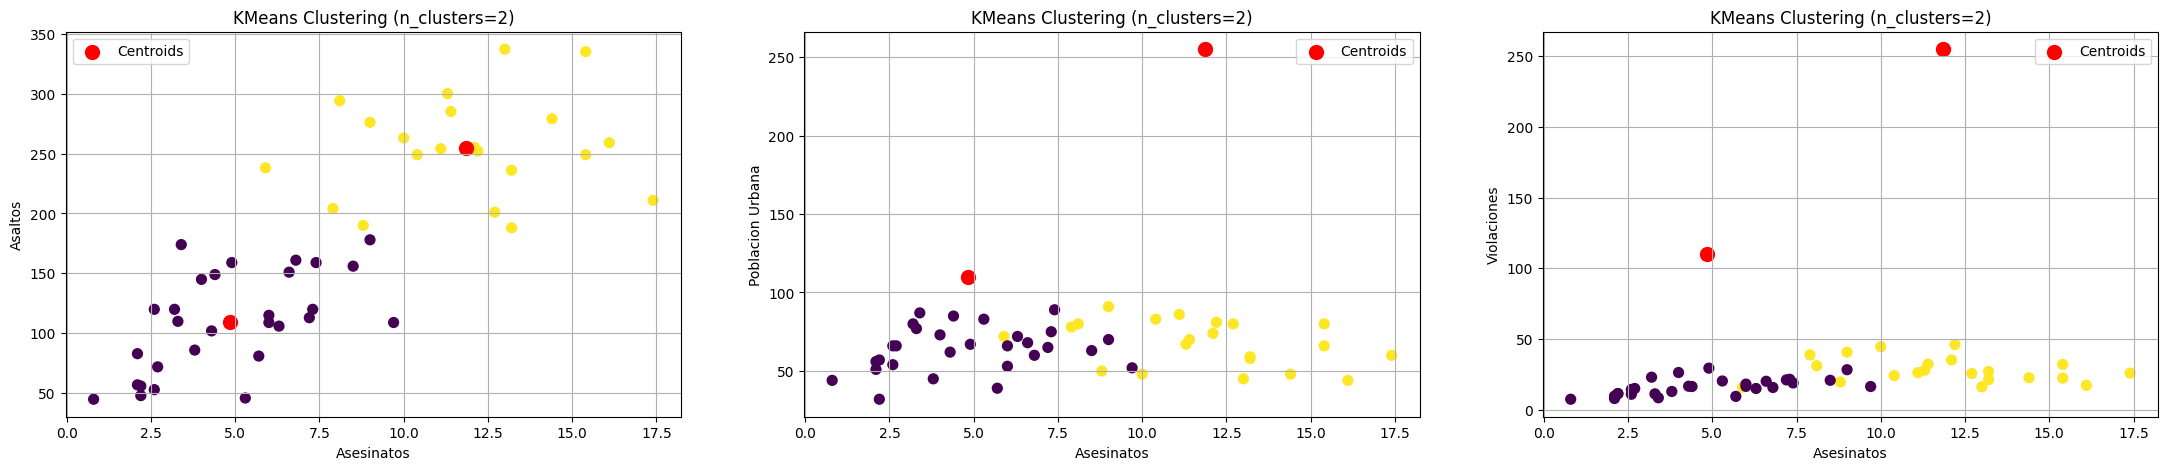

In [43]:
data = df.copy()
fit_and_plot_kmeans(data, 2);

In [44]:
 # Encontre una libreria para convertir los estados al formato que utiliza choropleth.
!pip install us

In [45]:
# Hago una prueba para mostrar la data
import plotly.express as px
import us
def plot_mapa(data):
  df_seguridad = data.loc[:,['Estado', 'Clusters']]

  # Agregar una nueva columna 'CódigoEstado' al DataFrame con los códigos de dos letras. Funcion sobre la libreria que encontre en internet.
  df_seguridad['CodigoEstado'] = df_seguridad['Estado'].apply(lambda estado: us.states.lookup(estado).abbr if us.states.lookup(estado) else None)
  # Filtrar las filas donde se obtuvo con éxito el código de dos letras
  df_seguridad = df_seguridad.dropna(subset=['CodigoEstado'])

  fig = px.choropleth(df_seguridad, locations='CodigoEstado', locationmode="USA-states", scope="usa", color='Clusters', color_continuous_scale='RdYlGn_r',title='Seguridad en los Estados Unidos')
  fig.update_layout(width=800, height=600,
                    coloraxis_colorbar=dict(
      title='Seguridad',
  ))

  fig.show()

In [46]:
plot_mapa(data)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



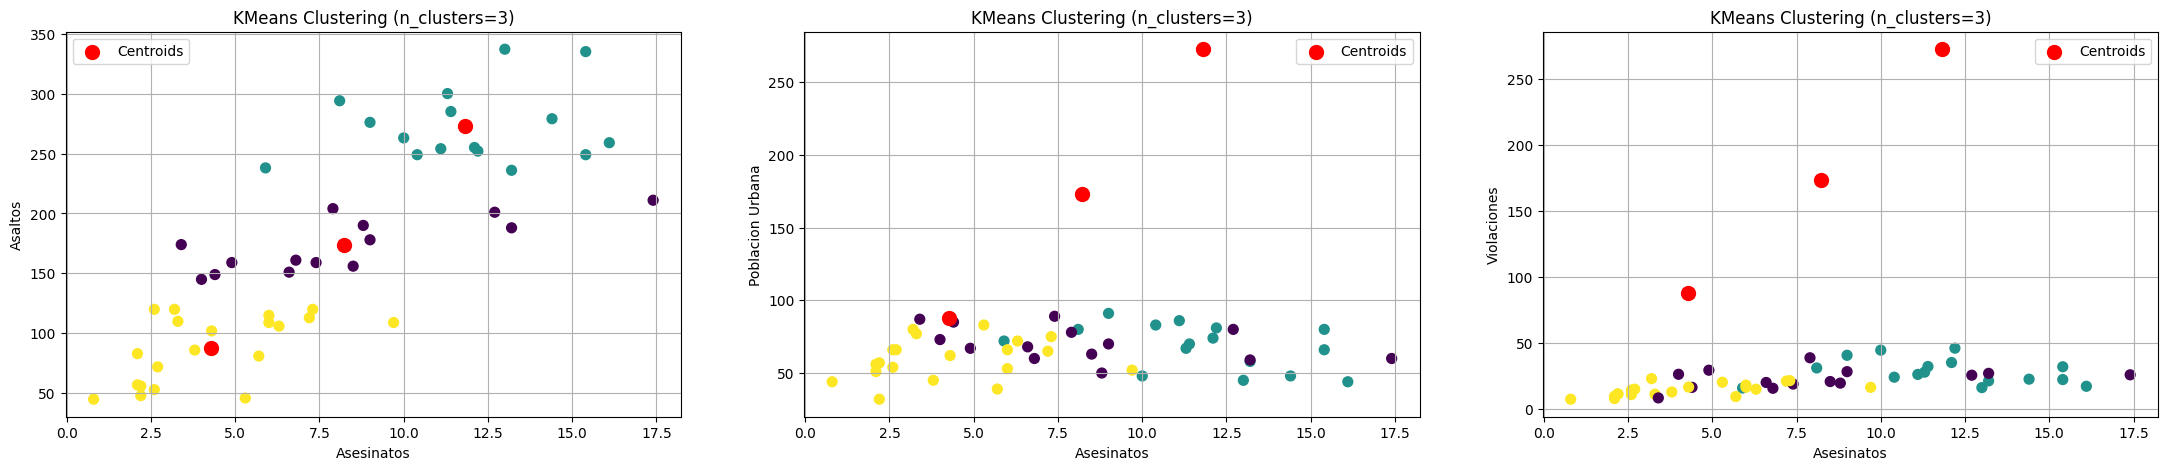

In [47]:
data = df.copy()
data.head()
fit_and_plot_kmeans(data, 3);

In [48]:
plot_mapa(data)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



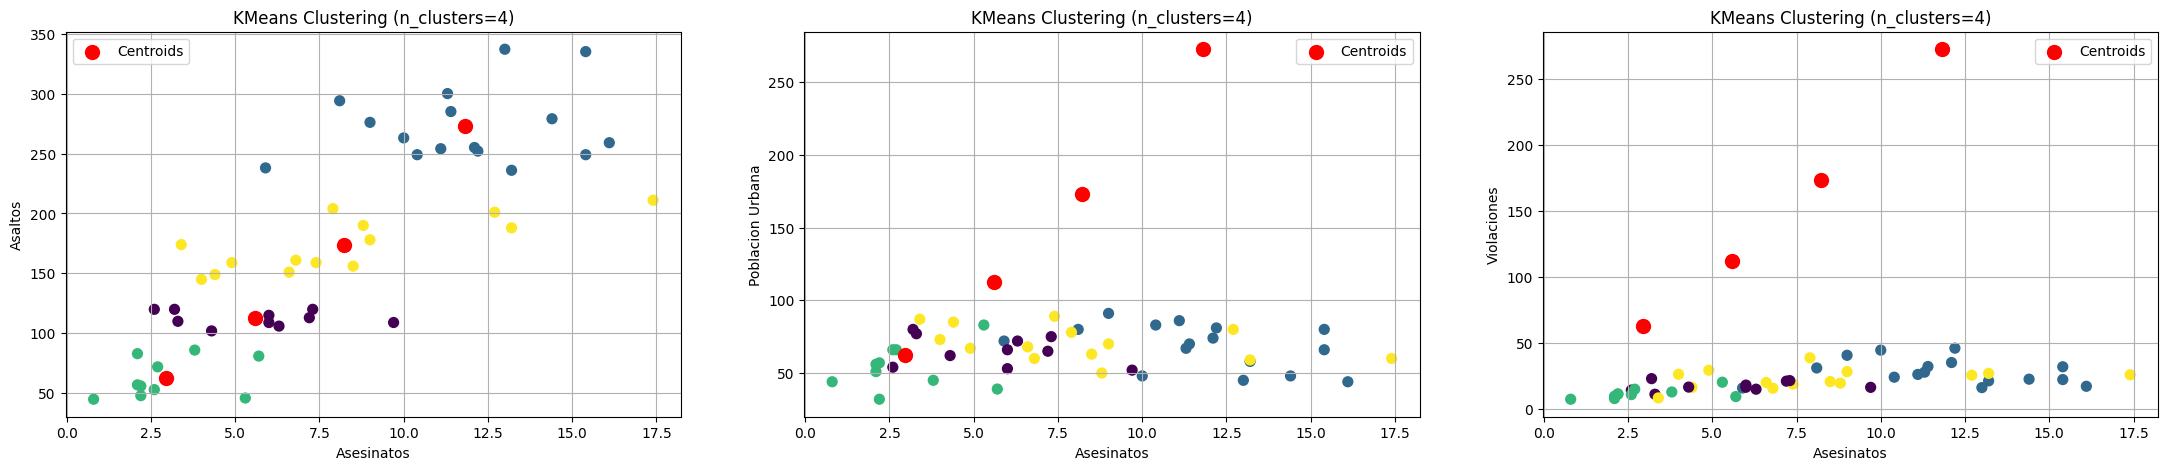

In [49]:
data = df.copy()
fit_and_plot_kmeans(data, 4);

In [50]:
plot_mapa(data)

#### Conclusiones / Preguntas

Claramente el grafico Asaltos vs Asesinatos muestra que le ubicacion de los centroides condice 'mejor' con la distribucion de los puntos cuando n_clusters > 2.
Sin embargo el razonamiento es tendencioso porque si miro los demas no parece lo mismo... No exactamente como interpretarlo. Entiendo que la variables que generan las coordenadas de los puntos son 4 (4D) por lo tanto graficar 2D cuando el punto tiene puede no ser representativo.

En el mapa se ven los Estados pintados en funcion del cluster al que pertenecen, sin embargo no quiere decir que el 0 implica Seguro y 1 Inseguro para los casos donde hay mas de 2 clusters. Solo es valido para n_cluster=2

## DBSCAN

In [51]:
data_ = df.copy()
data_.head()

,Estado,Asesinatos,Asaltos,Poblacion Urbana,Violaciones
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [52]:
from sklearn.neighbors import NearestNeighbors
# Uso la funcnion vista en clase


def find_optimal_eps_dbscan(data, min_samples=5):
    nn = NearestNeighbors(n_neighbors = min_samples)
    nbrs = nn.fit(data.iloc[:,1:])
    distances, indices = nbrs.kneighbors(data.iloc[:,1:])

    # Ordena las distancias y plotea
    distanceDec = sorted(distances[:, min_samples-1], reverse=True)
    plt.figure(figsize=(6, 4))
    plt.plot(list(range(1, len(distanceDec) + 1)), distanceDec)
    plt.xlabel("Number of Data Points")
    plt.ylabel("Distance to " + str(min_samples) + "th Nearest Neighbor")
    plt.title(f"Finding Optimal EPS for DBSCAN {min_samples}")
    plt.grid(True)
    plt.show()

In [53]:
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

def plot_dbscan(data,eps, min_samples):
  # Ajusta DBSCAN
  db = DBSCAN(eps=eps, min_samples=min_samples).fit(data.iloc[:,1:])

  # Etiquetas de cluster
  data['Clusters'] = db.labels_

  # Grafica los resultados
  plt.figure(figsize=(20, 8))
  unique_labels = np.unique(data['Clusters'])
  colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))

  # Grafica los clusters con colores diferentes asi como los valores 'ruido'

  for (label, color) in zip(unique_labels, colors):
      class_member_mask = (data['Clusters'] == label)
      xy = data[class_member_mask]
      plt.subplot(131), plt.scatter(xy['Asesinatos'], xy['Violaciones'], s=60, color=color, label='Cluster {}'.format(label) if label != -1 else 'Noise'), plt.grid(True), plt.xlabel('Asesinatos'), plt.ylabel('Violaciones')
      plt.subplot(132), plt.scatter(xy['Asesinatos'], xy['Asaltos'], s=60, color=color, label='Cluster {}'.format(label) if label != -1 else 'Noise'), plt.grid(True), plt.xlabel('Asesinatos'), plt.ylabel('Asaltos')
      plt.subplot(133), plt.scatter(xy['Asesinatos'], xy['Poblacion Urbana'], s=60, color=color, label='Cluster {}'.format(label) if label != -1 else 'Noise'), plt.grid(True), plt.xlabel('Asesinatos'), plt.ylabel('Poblacion Urbana')

  plt.title(f'DBSCAN Clustering with epsilon={eps}')
  plt.grid(True)
  plt.legend()
  plt.show()

  return data

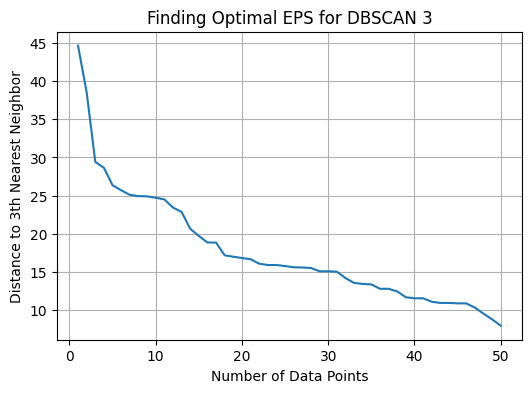

In [54]:
find_optimal_eps_dbscan(data_,3)

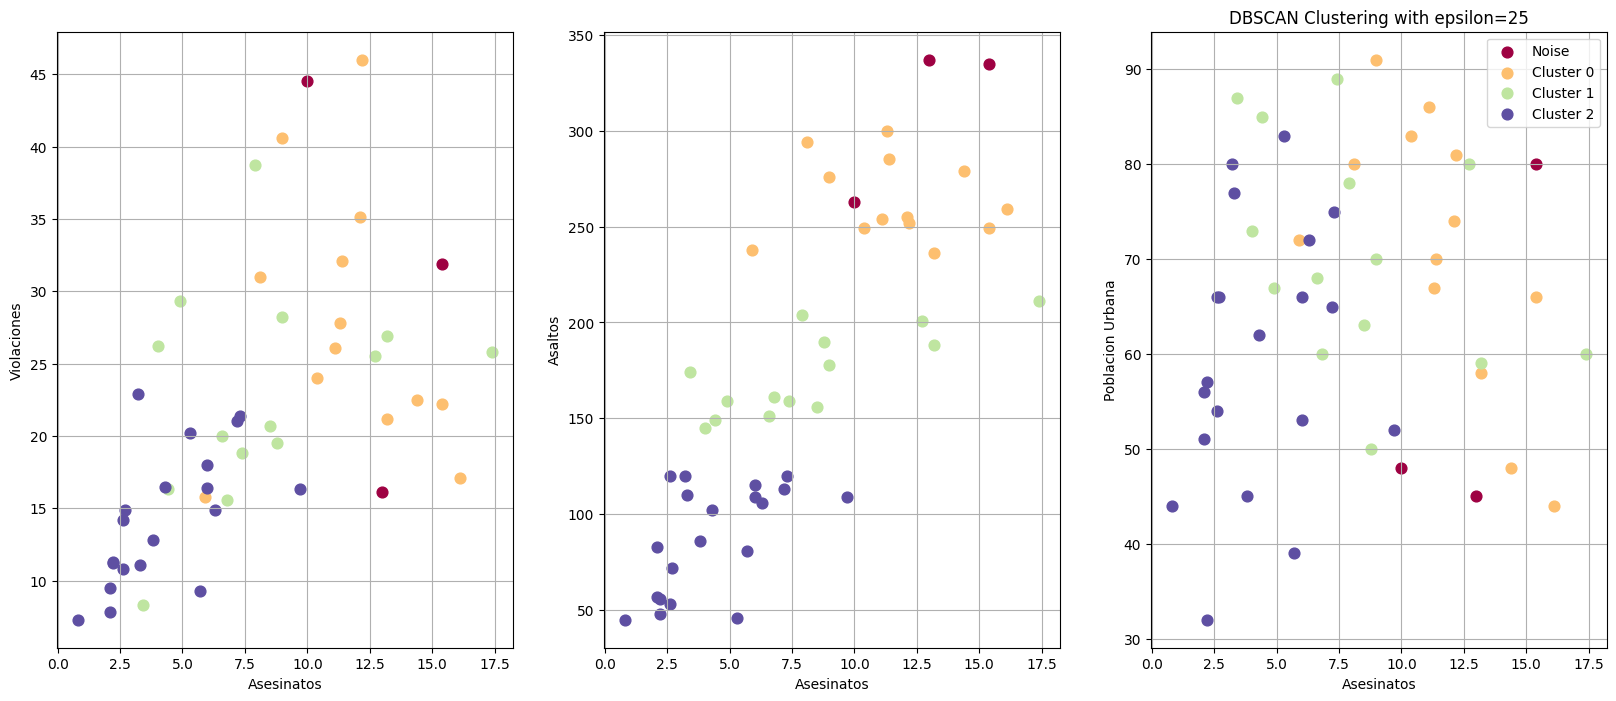

In [55]:
plot_dbscan(data_,25, 3);

In [56]:
plot_mapa(data_)

Si pruebo con valores de eps>25 me genera solo 1 cluster y con menores me genra demasiados

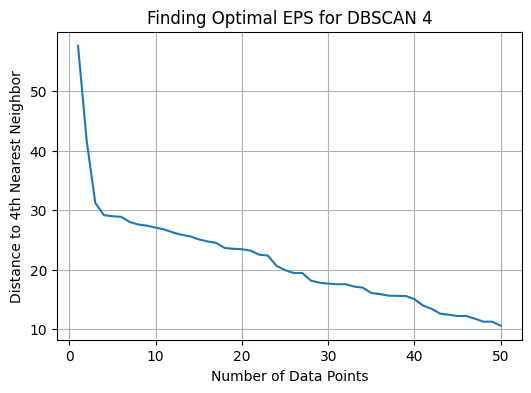

In [57]:
find_optimal_eps_dbscan(data_,4)

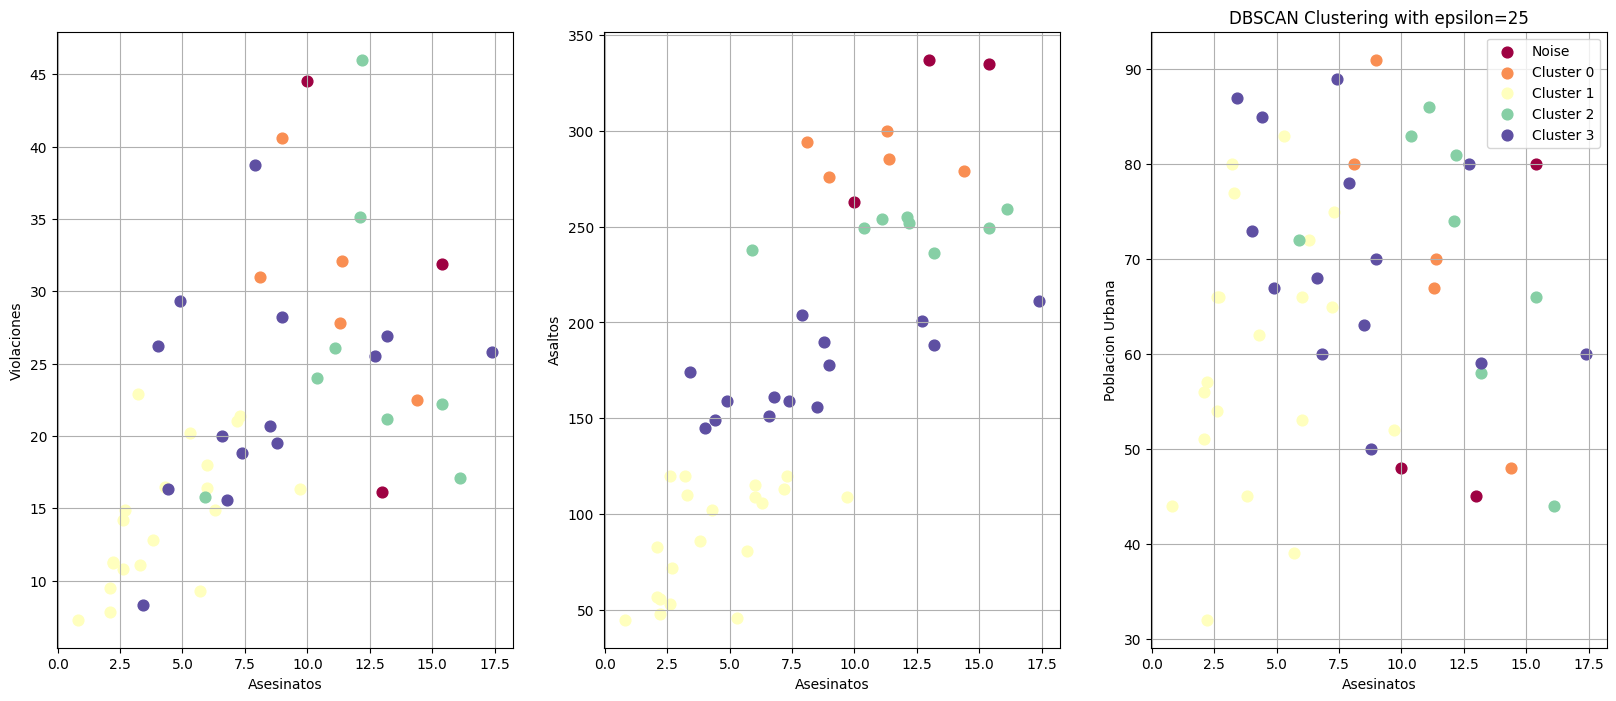

In [58]:
plot_dbscan(data_,25, 4);

Si pruebo con valores de eps>25 me genera solo 1 cluster y con menores me genera demasiados

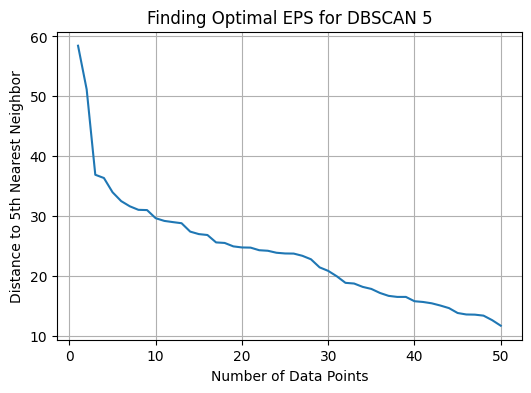

In [59]:
find_optimal_eps_dbscan(data_,5)

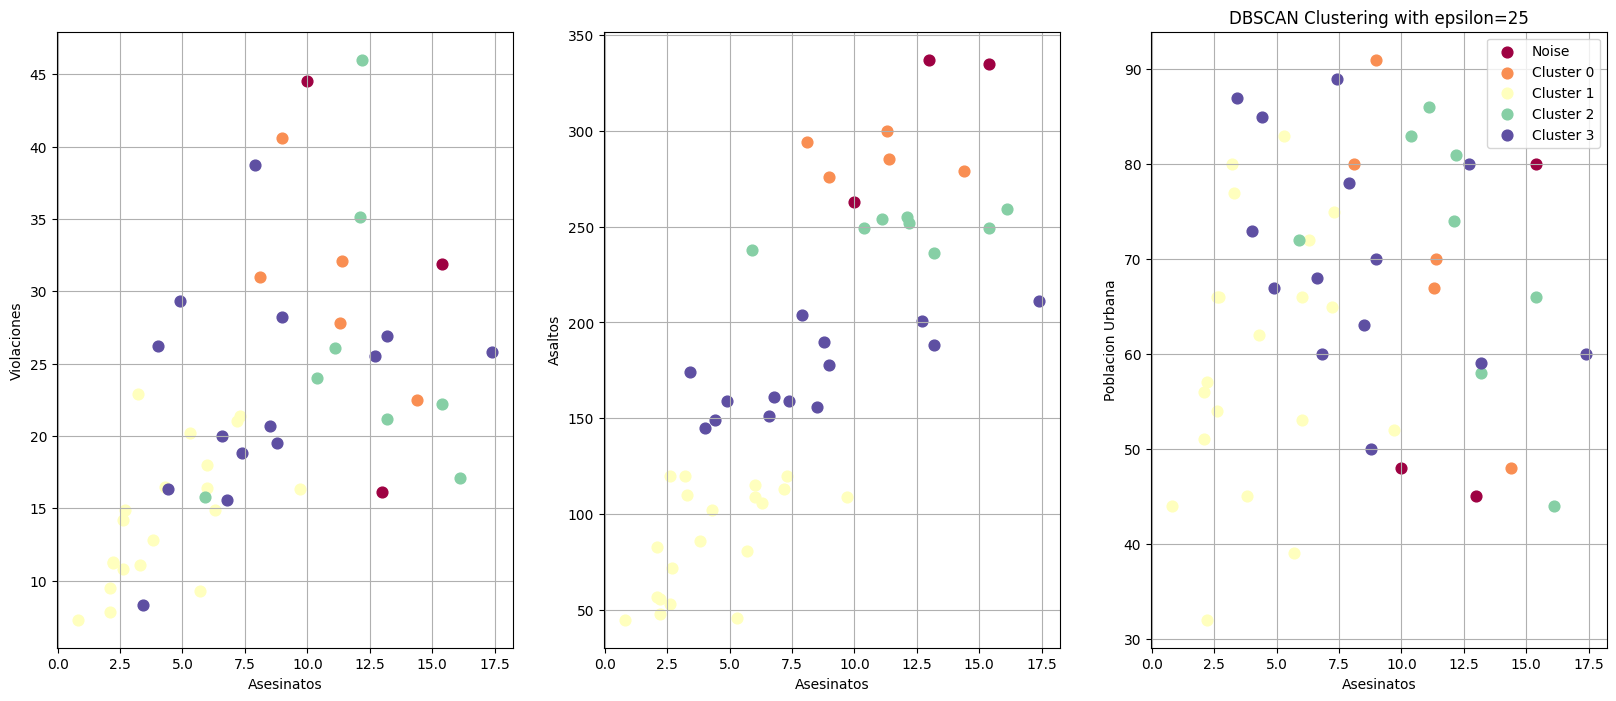

In [60]:
plot_dbscan(data_,25, 4);

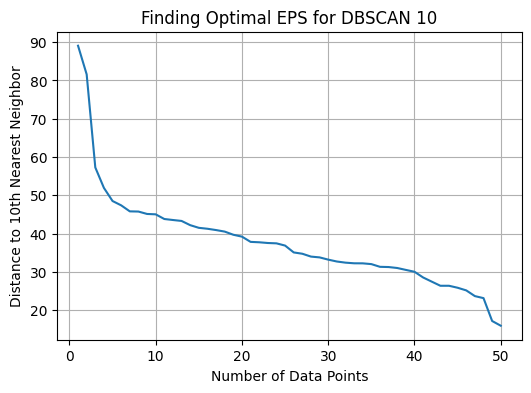

In [61]:
find_optimal_eps_dbscan(data_,10)

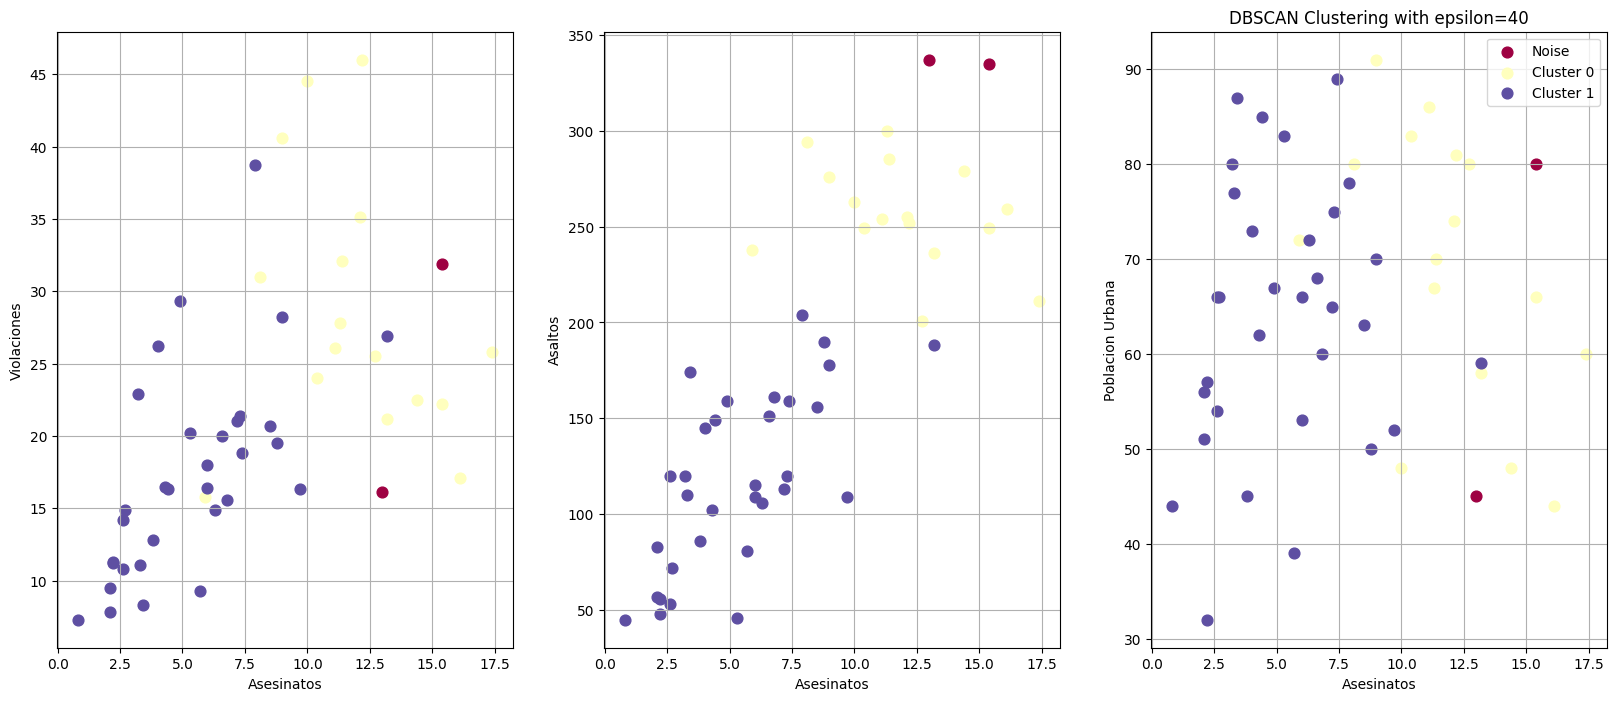

In [62]:
plot_dbscan(data_,40, 10);

Con estos hiperparametros y despues de probar bastante, encuentro que me devuelve 2 clusters y tiene relativamente pocos ourliers. No es precisamente el objetivo tener pocos outliers pero los datos son muy sensibles al eps, y o me genera muchos/1 clusters o me genera muchisimos outliers.


### MAPA DBSCAN

In [63]:
plot_mapa(data_)

### Conclusiones
El dbscan me resulto mucho mas sensible tanto al eps como al min_sample. Not engo forma de aseverar cual metodo de clustering es mas eficiente para ete caso de analisis ya que no hay ninguna metrica contra la que comparar